In [21]:
import string
import nltk
import pandas as pd
from collections import Counter
from nltk.stem.porter import PorterStemmer
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

In [86]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)

    if corrected_text is not None:
        corrected_text = list(filter(lambda item: item is not None, corrected_text))
        return " ".join(corrected_text)

    

In [87]:
L = []
with open('little_prince.txt', 'r') as fin:
    for line in fin:   
        # Process the line


        line = line.lower()
        result = line.translate(str.maketrans('','', string.punctuation))
        result = result.strip()
        result = result.replace('\n', '')

        result = ''.join([i for i in result if not i.isdigit()])

        result = remove_stopwords(result) # remove stopwords
        
        tokens = nltk.word_tokenize(result)
        
        tokens = ' '.join(tokens)
        if tokens == '':
            continue
        L.append(tokens)


In [112]:
df = pd.DataFrame(L, columns=['tokens'])
df["text_stemmed"] = df["tokens"].apply(lambda text: stem_words(text))
df["html_removed"] = df["text_stemmed"].apply(lambda text: remove_html(text))
df.head()

,tokens,text_stemmed,html_removed
0,antoine de saintexupery,antoin de saintexuperi,antoin de saintexuperi
1,antoine de saintexupery french author journali...,antoin de saintexuperi french author journalis...,antoin de saintexuperi french author journalis...
2,little prince one year death,littl princ one year death,littl princ one year death
3,little prince appears simple childrens tale,littl princ appear simpl children tale,littl princ appear simpl children tale
4,say actually profound deeply moving tale,say actual profound deepli move tale,say actual profound deepli move tale


In [113]:

df["spell"] = df["html_removed"].apply(lambda text: correct_spellings(text))
df.head()
#print('' == df.tokens[4])

,tokens,text_stemmed,html_removed,spell
0,antoine de saintexupery,antoin de saintexuperi,antoin de saintexuperi,anton de
1,antoine de saintexupery french author journali...,antoin de saintexuperi french author journalis...,antoin de saintexuperi french author journalis...,anton de french author journalist pilot wrote
2,little prince one year death,littl princ one year death,littl princ one year death,little prince one year death
3,little prince appears simple childrens tale,littl princ appear simpl children tale,littl princ appear simpl children tale,little prince appear simple children tale
4,say actually profound deeply moving tale,say actual profound deepli move tale,say actual profound deepli move tale,say actual profound deeply move tale


In [114]:
cnt = Counter()
for text in df["spell"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('little', 261),
 ('said', 197),
 ('prince', 188),
 ('one', 136),
 ('will', 81),
 ('planet', 73),
 ('flower', 68),
 ('look', 59),
 ('time', 52),
 ('star', 52)]

In [115]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(5)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["no_freq"] = df["spell"].apply(lambda text: remove_freqwords(text))
df.head()

,tokens,text_stemmed,html_removed,spell,no_freq
0,antoine de saintexupery,antoin de saintexuperi,antoin de saintexuperi,anton de,anton de
1,antoine de saintexupery french author journali...,antoin de saintexuperi french author journalis...,antoin de saintexuperi french author journalis...,anton de french author journalist pilot wrote,anton de french author journalist pilot wrote
2,little prince one year death,littl princ one year death,littl princ one year death,little prince one year death,year death
3,little prince appears simple childrens tale,littl princ appear simpl children tale,littl princ appear simpl children tale,little prince appear simple children tale,appear simple children tale
4,say actually profound deeply moving tale,say actual profound deepli move tale,say actual profound deepli move tale,say actual profound deeply move tale,say actual profound deeply move tale


In [117]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["no_rare"] = df["no_freq"].apply(lambda text: remove_rarewords(text))
df.head()

,tokens,spell,no_freq,no_rare
0,antoine de saintexupery,anton de,anton de,anton de
1,antoine de saintexupery french author journali...,anton de french author journalist pilot wrote,anton de french author journalist pilot wrote,anton de french author journalist pilot wrote
2,little prince one year death,little prince one year death,year death,year death
3,little prince appears simple childrens tale,little prince appear simple children tale,appear simple children tale,appear simple children tale
4,say actually profound deeply moving tale,say actual profound deeply move tale,say actual profound deeply move tale,say actual profound deeply move tale


In [116]:
# Drop the two columns which are no more needed 
df.drop(["html_removed", "text_stemmed"], axis=1, inplace=True)
df.head()

,tokens,spell,no_freq
0,antoine de saintexupery,anton de,anton de
1,antoine de saintexupery french author journali...,anton de french author journalist pilot wrote,anton de french author journalist pilot wrote
2,little prince one year death,little prince one year death,year death
3,little prince appears simple childrens tale,little prince appear simple children tale,appear simple children tale
4,say actually profound deeply moving tale,say actual profound deeply move tale,say actual profound deeply move tale


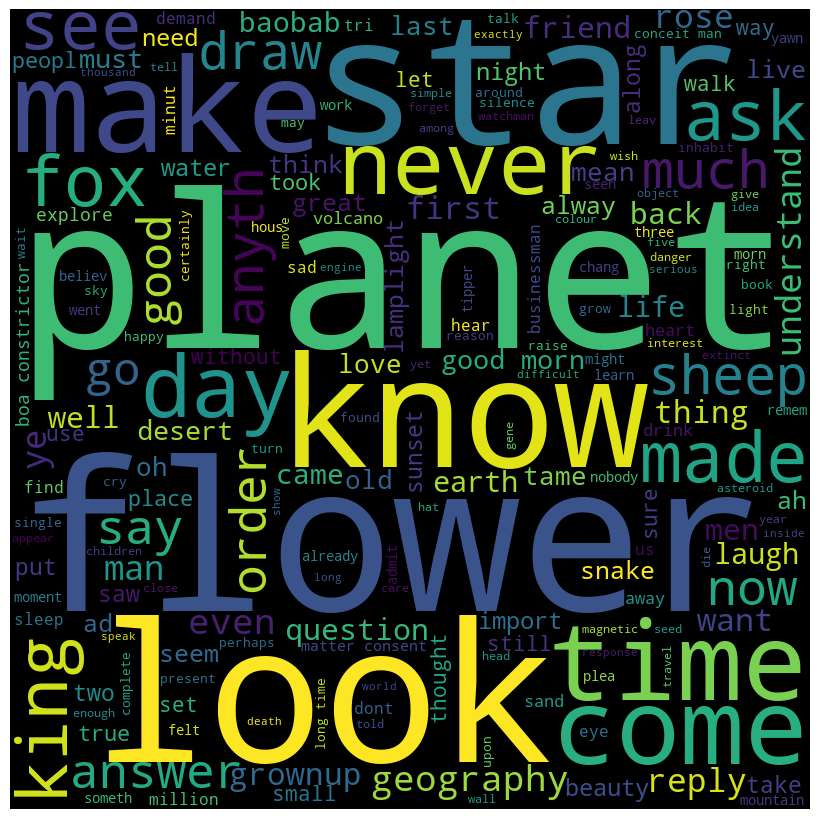

In [119]:
huge_str = ''
stopwords = set(STOPWORDS)

filtered = []
for val in df.no_rare:
    filtered.append(val)

huge_str = ' '.join(filtered)

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='black',
            stopwords = stopwords,
            min_font_size = 10).generate(huge_str)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()